# Assessment - PCA,KNN,NB model 


# Abstract:
   The given dataset is wine dataset with number of features like alcohol values teh composition values,the color intensity etc.. Using all these independent contionous variable we have predict the customer segment which cateogorical. Here we are going to use Principal component analysis to find the best fit and find the accuracy using K nearest neighbor , support vector method and naive bayes theroem.

#### Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data From CSV File

In [2]:
 mydata = pd.read_csv("Wine.csv")
mydata.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [3]:
mydata.tail(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
168,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750,3
169,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630,3
170,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510,3
171,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470,3
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660,3
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.200000,0.61,1.60,560,3


#### 1.Compute and plot those feature which are related to each other?

## check the datatypes:

In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


## check null value

In [5]:
mydata.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

### how many of each class is in our data set

In [6]:
mydata['Customer_Segment'].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

## correlation:

In [7]:
mydata_corr = mydata.corr()
mydata_corr

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


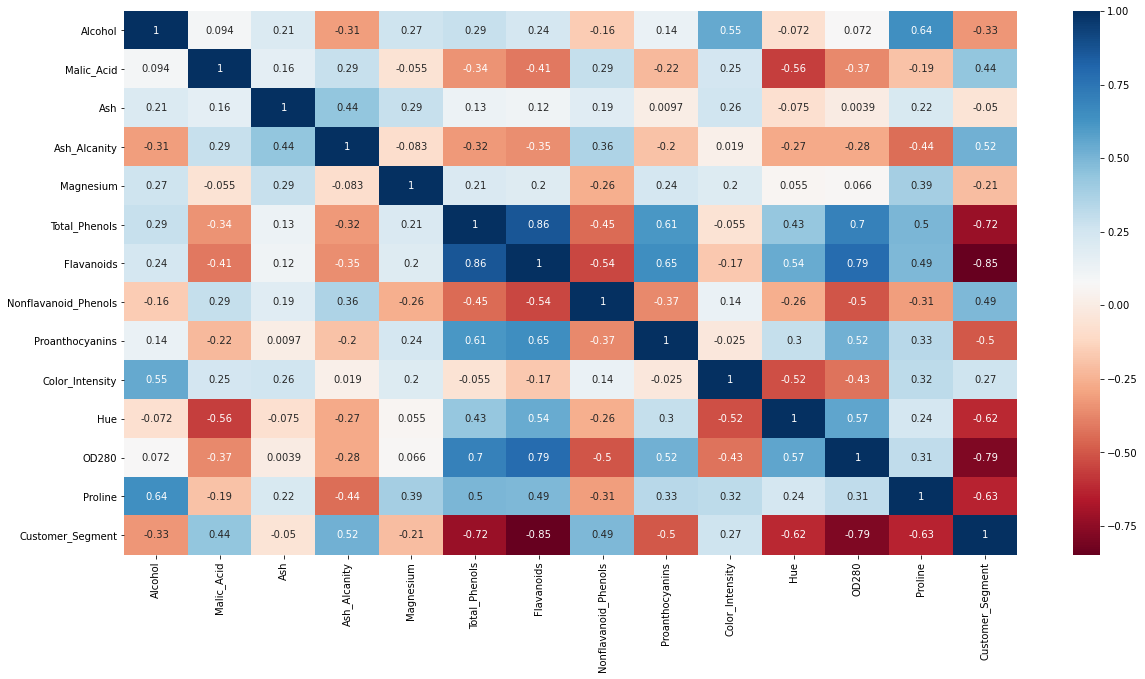

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(mydata_corr, annot = True, cmap = 'RdBu')

## Check the linearity:

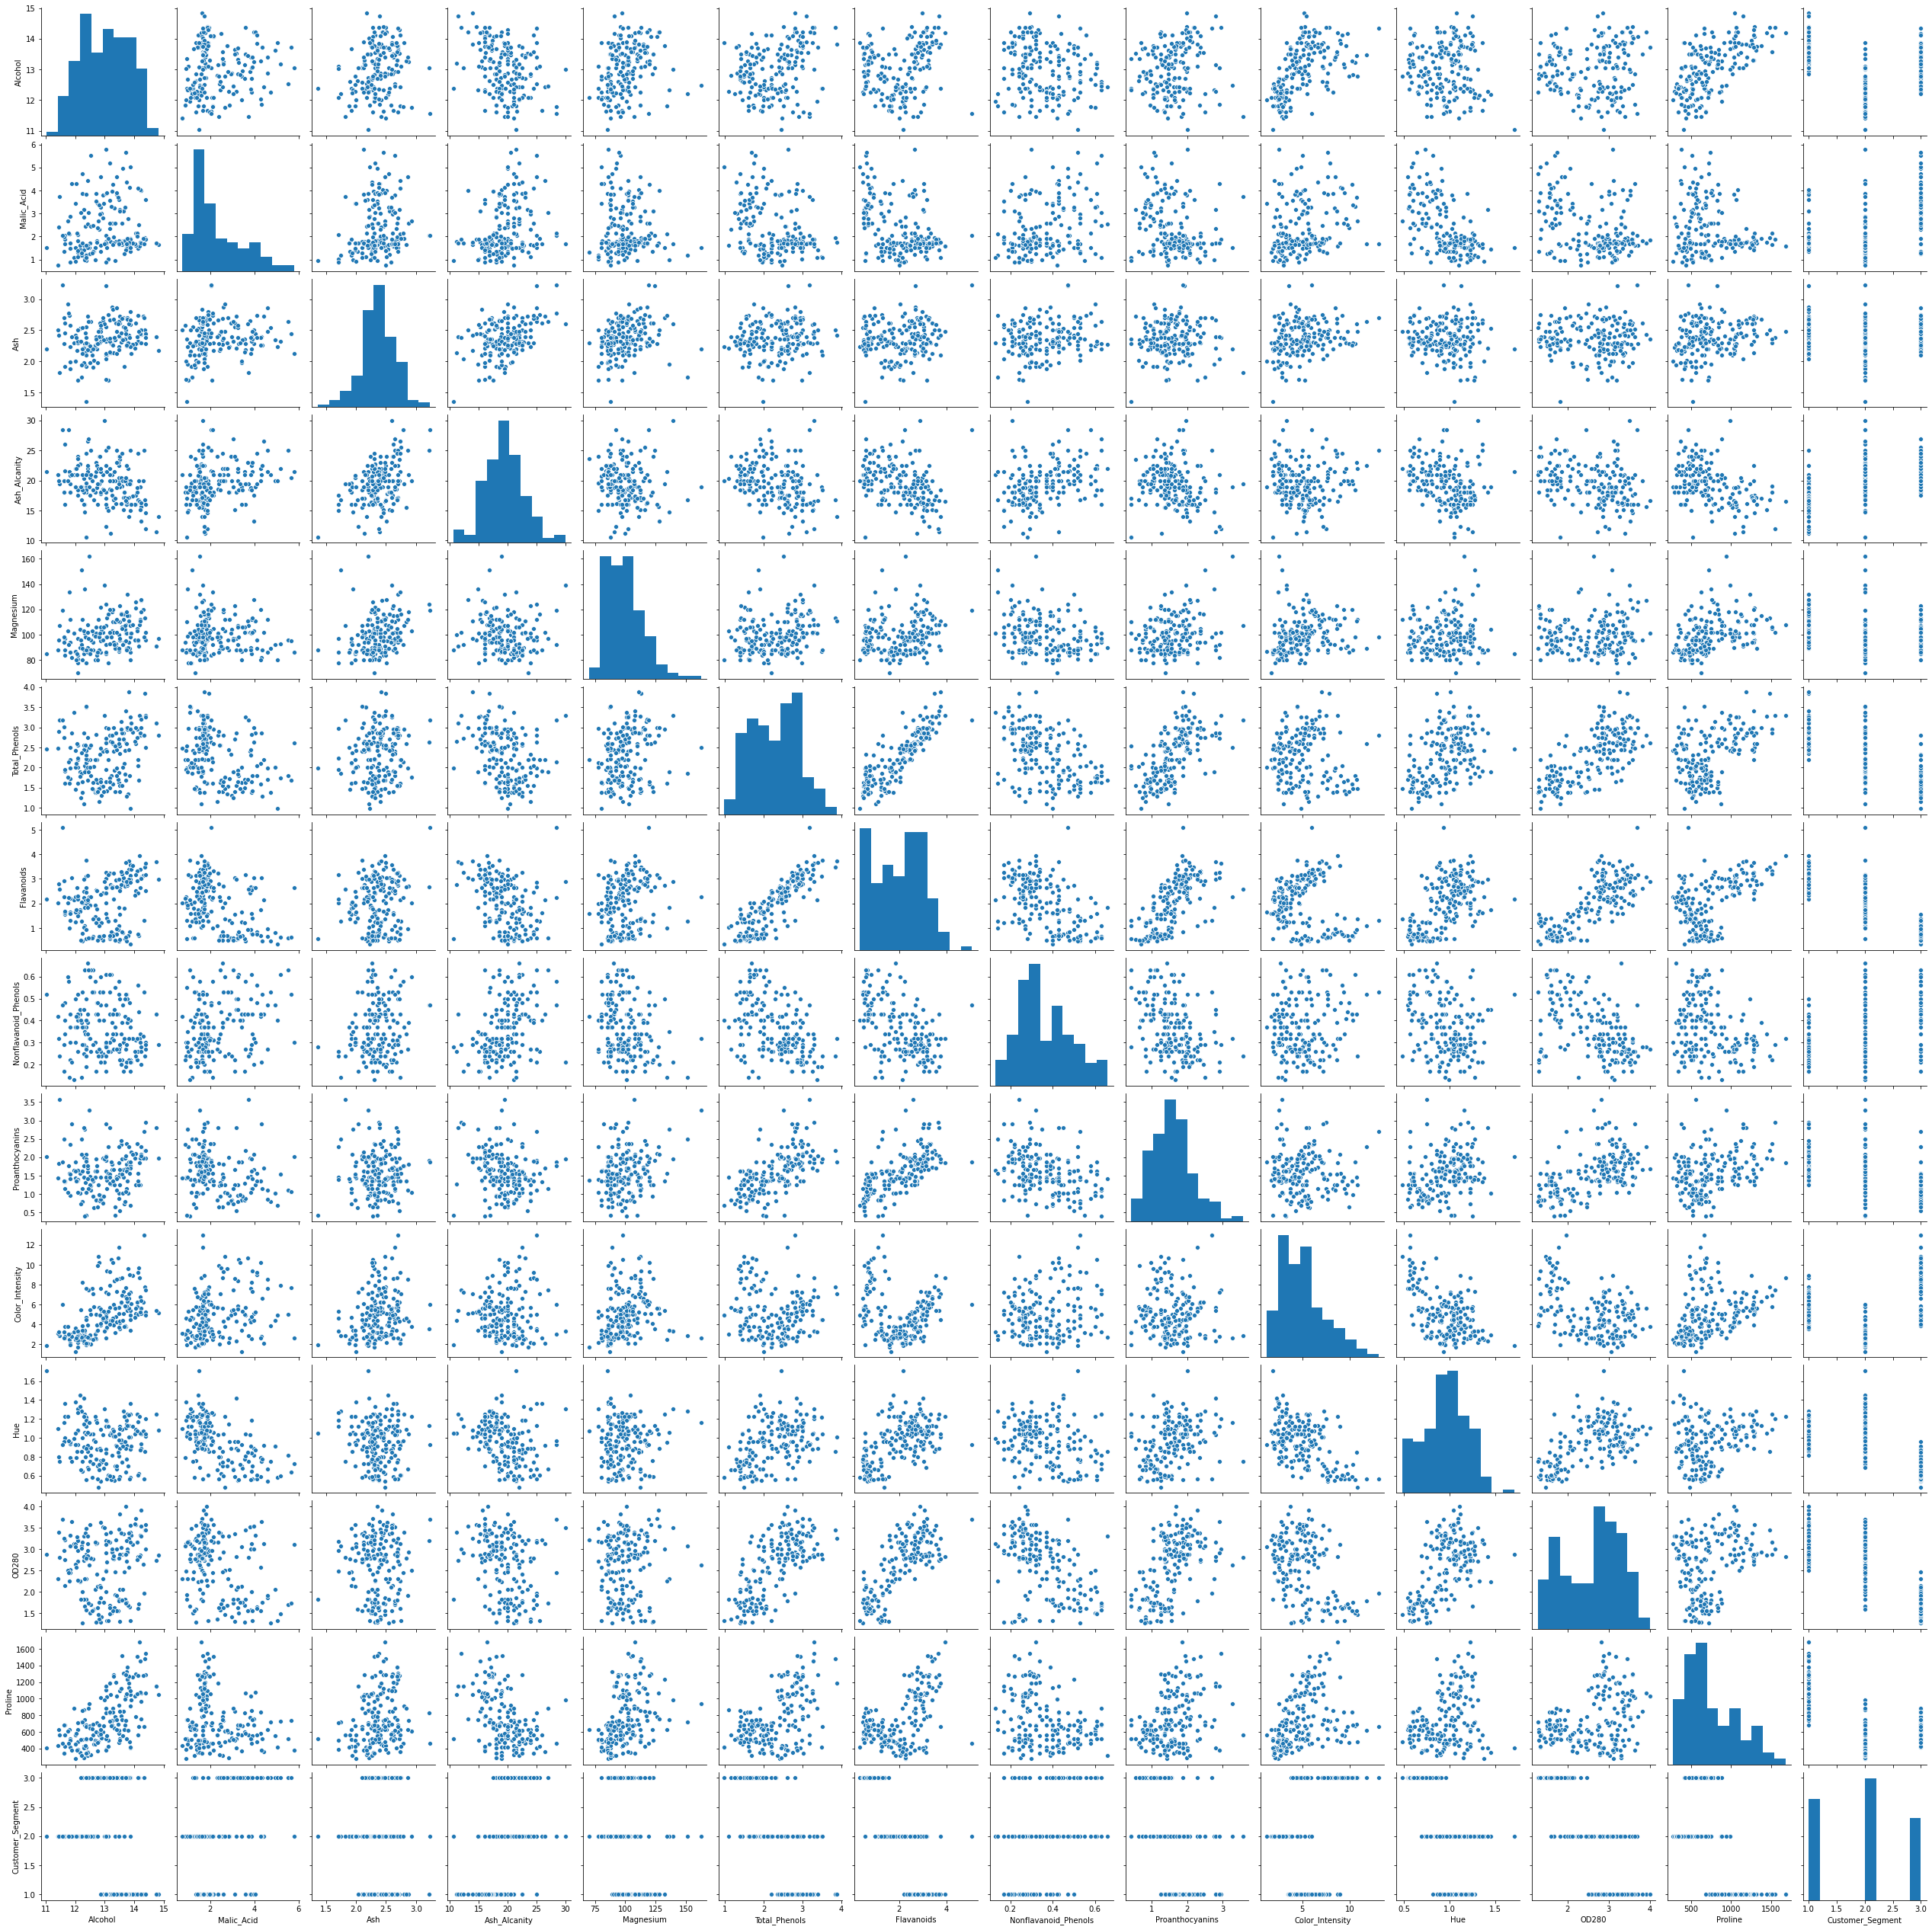

In [9]:
sns.pairplot(mydata)

## barplot

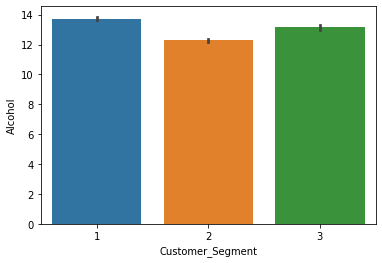

In [10]:
sns.barplot(x="Customer_Segment",y='Alcohol',data=mydata);

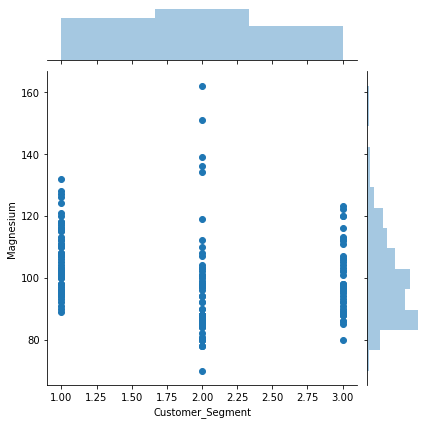

In [11]:
sns.jointplot(x="Customer_Segment",y='Magnesium',data=mydata);

### Scatterplot:
   Scatter plot is used to plot contionous variable.It helps to find out the outlier.

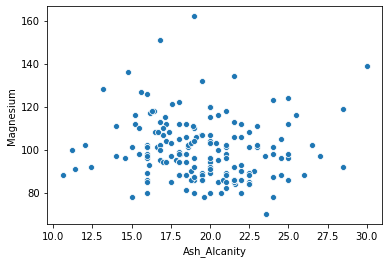

In [17]:
sns.scatterplot(x ='Ash_Alcanity',y = 'Magnesium', data = mydata)

### Independent Variable:
To build the model we must separate the independent and dependent variable. 

In [20]:
x_ind = mydata.drop('Customer_Segment', axis = 1)
x_ind

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Data Standardization
 It give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
norm=StandardScaler()

In [23]:
x_norm=norm.fit_transform(x_ind)

### 2.What are the optimum number of principal components in PCA?

## Principal Component Analysis - PCA
   It is used to reduce the dimensionality of dataset, increase interpretability but same time it minimize the losses The process by transforming the variables to new set of variables is known as principal components.

In [24]:
from sklearn.decomposition import PCA # Principal component Analysis

In [25]:
Pca_Reduce=PCA()

### Fit the model

In [26]:
x_new=Pca_Reduce.fit_transform(x_norm) # Getting new x variables by fiiting the model by PC line

In [27]:
x_new

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

### Covariance matrix:


In [28]:
cov_mat=np.cov(x_norm.T)

### Eigen values:

In [29]:
eigen_vals,eigen_vecs=np.linalg.eig(cov_mat)

### Explained variance ratio
   It ll show the percentage of each principal component.

In [30]:
explained_variance=Pca_Reduce.explained_variance_ratio_

In [31]:
explained_variance  # Together we have 96 % of information.

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

<BarContainer object of 13 artists>

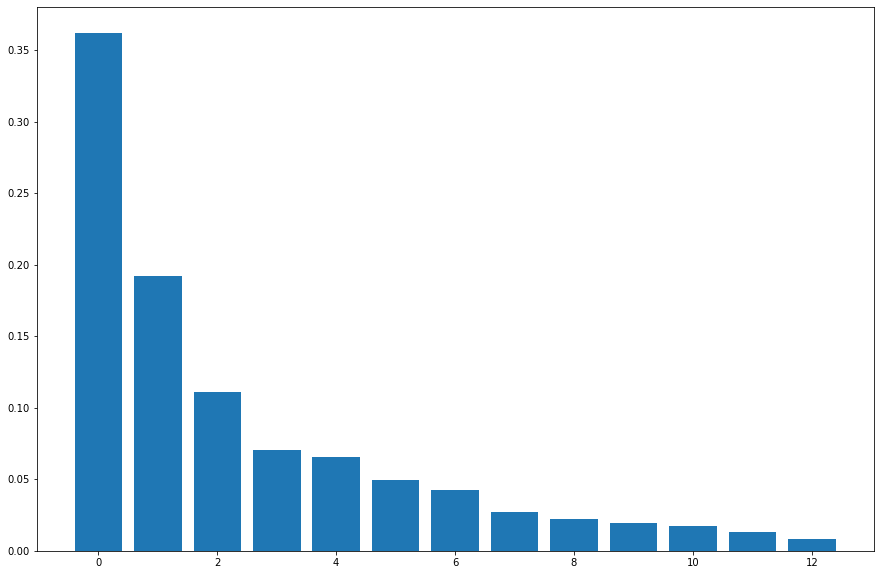

In [32]:
plt.figure(figsize=(15,10))
plt.bar(range(13),explained_variance,label="Wine dataset")

### Applying PCA

In [33]:
pca=PCA(n_components=11) # 96 % data values covered

### New standardize independent variable:

In [34]:
x_new_info=pca.fit_transform(x_norm)

In [35]:
x_new_info

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
         6.41442706e-01,  1.02095585e+00, -4.51563395e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -3.08846753e-01,  1.59701372e-01, -1.42657306e-01],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -1.17783447e+00,  1.13360857e-01, -2.86672847e-01],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         1.22214687e-03, -2.47997312e-01,  5.12492025e-01],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         5.74476725e-02,  4.91489502e-01,  2.99821968e-01],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
         7.41660423e-01, -1.17969019e-01, -2.29964331e-01]])

# Train and Test data: 
   It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.
    This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
y_dep=mydata.Customer_Segment
y_dep

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: int64

#### Train and test using new x_new

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x_new_info,y_dep,train_size=0.8,random_state=2)

### 3.Build a KNN classifier considering optimal number of principal components and value of K and state its score.

## K-Nearest Neighbors
  It is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification. K is KNN rerpresents no of nearest neighbors we used to classofy new data points.



### Classifier implementing the k-nearest neighbors vote.

In [39]:
from sklearn.neighbors import KNeighborsClassifier

#### No of rows and columns

In [40]:
mydata.shape

(178, 14)

## squareroot
 By choosing the value of K we square root the total number of datapoints available in dataset. 

In [41]:
np.sqrt(178) # K = sqrt(total no of datapoints.)

13.341664064126334

In [47]:
knn_pca=KNeighborsClassifier(n_neighbors=13,p=3,metric='euclidean') # calculate the distance using eeuclidean formula

## Training

In [48]:
knn_pca.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13, p=3)

## Predicting

In [49]:
y_pred=knn_pca.predict(x_test) # Assign to test point to predict

### Performance measures:

In [50]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [51]:
accuracy_score(y_test,y_pred)

0.9722222222222222

In [52]:
confusion_matrix(y_test,y_pred)

array([[18,  0,  0],
       [ 1,  8,  0],
       [ 0,  0,  9]])

In [53]:
from sklearn.metrics import classification_report

In [54]:
class_report = classification_report(y_test,y_pred)

In [55]:
print(class_report)

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.89      0.94         9
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



## Thus our accuracy based on sqrt method is 97 % calculated by euclidean distance.

## 2.Error Rate Method:

In [56]:
error_rate=[]
for i in range(1,60):
    knn_er=KNeighborsClassifier(n_neighbors=i)
    knn_er.fit(x_train,y_train)
    y_pred_er=knn_er.predict(x_test)
    error_rate.append(np.mean(y_pred_er !=y_test))

Text(0, 0.5, 'Error_rate')

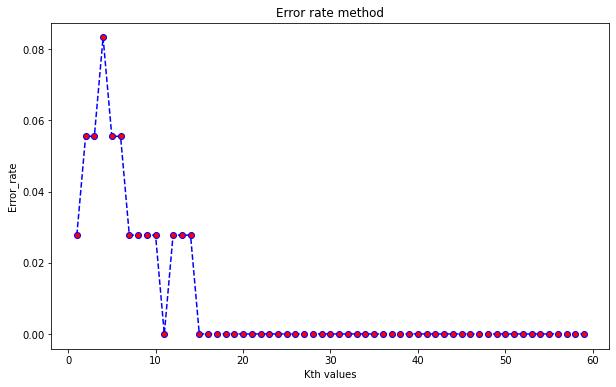

In [57]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue',linestyle='dashed',
        marker='o',markerfacecolor='red')
plt.title("Error rate method")
plt.xlabel("Kth values")
plt.ylabel("Error_rate")

In [58]:
# after error rate method we found the optimal k value is 15
KNN1=KNeighborsClassifier(n_neighbors=15,p=3,metric='euclidean')

In [59]:
KNN1=KNN1.fit(x_train,y_train)

In [60]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [61]:
KNN1 =  KNN1.fit(x_train, y_train)
y_pred = KNN1.predict(x_test)
accuracy_score(y_test, y_pred)



1.0

In [62]:
confusion_matrix(y_test, y_pred)

array([[18,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  9]])

In [63]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## Thus using KNN method using error rate method our accuracy is 100% to our dataset.It has good f1 ,recall and precision value 

### 4.Build a SVM Classifier and tune the hyperparameters to get the optimum model.

# 2. Support Vector Method
   Suppport Vector method uses kernel functions to find support vector classifier in higher dimensions. A kernel is a  functions that returns the result of a dot product performed in another space.It used to map data in higher dimension.

In [64]:
from sklearn.svm import SVC # SVC is support vector machine

In [65]:
model=SVC(kernel='linear') # we have used linear kernel

In [66]:
fit_model=model.fit(x_train,y_train)

## Prediction:

In [67]:
y_pred=fit_model.predict(x_test)

In [68]:
y_pred

array([1, 1, 3, 1, 1, 1, 2, 3, 2, 1, 2, 1, 1, 3, 3, 2, 1, 1, 1, 3, 3, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 3, 2, 3, 3, 1, 2])

## Performance Measures:

In [69]:
confusion_matrix(y_test,y_pred)

array([[18,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  9]])

In [70]:
accuracy_score(y_test,y_pred)

1.0

In [71]:
from sklearn.metrics import classification_report

In [72]:
class_report = classification_report(y_test,y_pred)

In [73]:
print(class_report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## Thus our accuracy using Support vector method is 100% and it has good recall,f1,precision value.

In [74]:
fit_model.n_support_   

array([ 5, 12,  7], dtype=int32)

In [75]:
kernel=['linear','rbf','poly','sigmoid']

In [76]:
for i in kernel:
    model1=SVC(kernel=i)
    model1=model1.fit(x_train,y_train)
    print("Kernel: ", i)
    print("Acc score: " , accuracy_score(y_test,model1.predict(x_test)))

Kernel:  linear
Acc score:  1.0
Kernel:  rbf
Acc score:  0.9444444444444444
Kernel:  poly
Acc score:  0.8611111111111112
Kernel:  sigmoid
Acc score:  1.0


## Thus accuracy for dataset is if we used radial bases is 94 % and poly is 86%.But the accuracy for linear and sigmoud is 100% to our dataset

### 5.Build a Naive Bayes Classifier and comment about its accuracy.

# 3.Naive Bayes Theorem:
   Naive bayes theorem are group of high speed and simple classification algorithm and suitable for high dimensional dataset and mainly built on bayesian theorem

In [77]:
from sklearn.naive_bayes import GaussianNB

### A Guassian distribution is also cakked normal distribution contionous variable are distibuted according to guassian

In [78]:
model=GaussianNB()

### Train the model

In [79]:
model.fit(x_train,y_train)

GaussianNB()

## Prediction

In [80]:
y_pred=model.predict(x_test)

## Performance Measures 

In [81]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [82]:
accuracy_score(y_pred,y_test)

0.9444444444444444

In [83]:
confusion_matrix(y_test,y_pred)

array([[17,  1,  0],
       [ 0,  9,  0],
       [ 0,  1,  8]])

In [84]:
x_train.shape

(142, 11)

In [85]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        18
           2       0.82      1.00      0.90         9
           3       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.95      0.94      0.95        36



## Thus accuracy based on Guassian Naive bayes is 94 %.

#### 6.Compare all of the models and justify your choice

# Conclusion:
   Thus we have model our dataset using principal component ananlysis(PCA),K Nearest neighbors (KNN),Support vector Machine(SVM) and Naive Bayes theorem(NB) method.The accuracy using all these algorithms is above 95% that means this dataset is best for modelling.But using Knn and SVM our accuracy is 100%. So if we use SVM and KNN we have 100% prediction is correct on wine dataset.